In [1]:
%matplotlib inline

In [11]:
import pandas as pd

In [2]:
from PyCMLib import *

In [28]:
ac_regexes = [(r'\bFLAASH\b', 'FLAASH'),
              (r'\bATCOR\b', 'ATCOR'),
              (r'\bSMAC\b', 'SMAC'),
              ('6S', '6S'),
              (r'\bempirical line\b', 'empirical line'),
              (r'\bELM\b', 'ELM'),
              (r'\bARCSI\b', 'ARCSI')]

In [29]:
results = process_all_articles('mdpi-rs/**', pf_count_regex, regexes=ac_regexes)

In [30]:
def f(x):
    if len(x) == 2:
        return x[1]
    else:
        return x

In [31]:
cols = [f(r) for r in ac_regexes]

In [32]:
r = results[cols]

In [33]:
bool_res = results.copy()

In [34]:
bool_res[cols] = (r > 0)

In [35]:
bool_res.index = pd.DatetimeIndex(bool_res.date)

In [36]:
yearly = bool_res.resample('A', how='sum')

In [37]:
bool_res.resample('A', how='count').title

2009-12-31     82
2010-12-31    132
2011-12-31    137
2012-12-31    189
2013-12-31    338
2014-12-31    589
2015-12-31    772
Freq: A-DEC, Name: title, dtype: int64

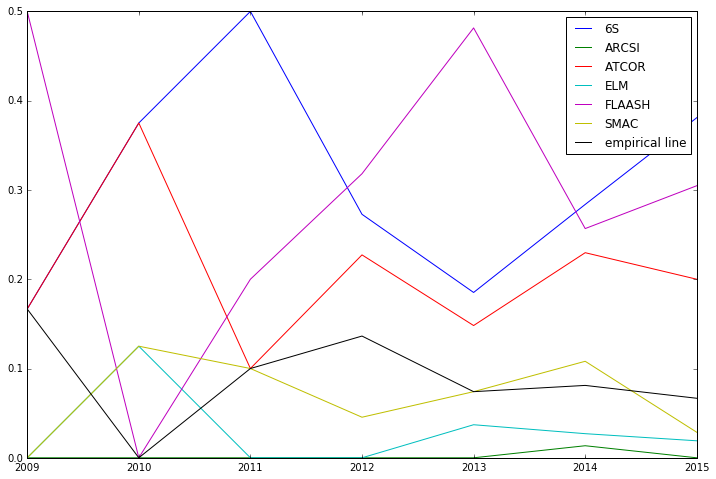

In [38]:
yearly.div(yearly.sum(axis=1), axis='index').plot(figsize=(12,8))

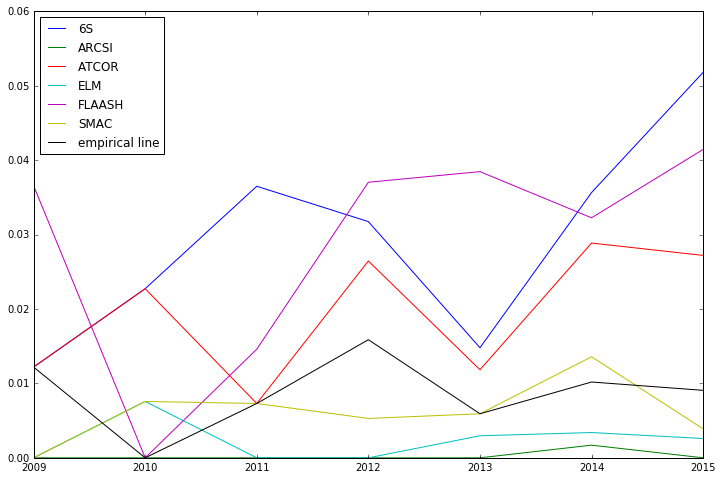

In [39]:
yearly.div(bool_res.resample('A', how='count').title, axis='index').plot(figsize=(12,8))